### **Importing Related Notebooks** 

In [2]:
import import_ipynb
import Data_Preparation

data = Data_Preparation.data

### **Explanatory Data Analysis**

In this section, data will be examined, transformed, and also modeled to identify patterns, trends, and information useful in making decisions. First of all, the data will be filtered based on the video availability status in the `Video Availability` column. Then add some special libraries to create data visualizations.

##### **Importing Library and Data Filtering**

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

data = data[data['Video Availability']=='Available'].drop('Video Availability', axis=1)
data = data.reset_index().drop('index',axis=1)
font_manager.fontManager.addfont('Fonts/NotoSansKR-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans KR'
font_manager.findfont('Noto Sans KR')

'C:\\Users\\REY007\\Learn\\Project Portfolio\\Statistical Analysis on Youtube Trending Video\\Fonts\\NotoSansKR-Regular.otf'

##### **Views Research**

The analysis in this section is to identify impression metrics based on data in the views column. Here it will be examined whether there is a significant difference between the average number of views in each video category. First of all, the process carried out is to examine the overall distribution of data by using histogram and boxplot visualizations.

Text(0.5, 0, 'Views')

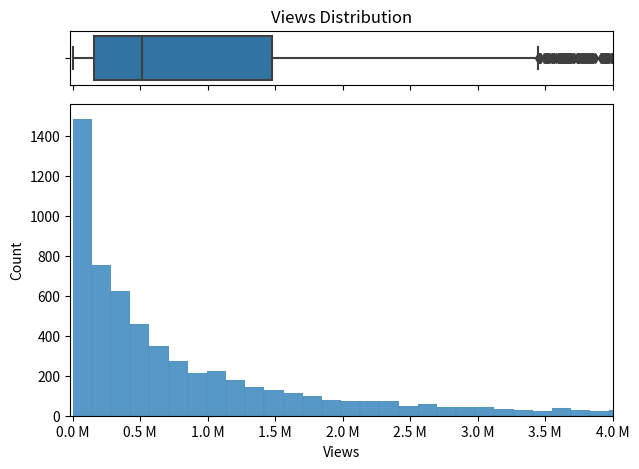

In [4]:
import seaborn as sns, matplotlib.ticker as ticker

view_distribution = data[['Video ID','Views']].copy()
view_distribution = view_distribution.groupby('Video ID')[['Views']].max()

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[.7,4],'hspace':.1})
boxplot = sns.boxplot(x=view_distribution['Views'].values,ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Views Distribution')
histplot = sns.histplot(x=view_distribution['Views'].values,ax=axs[1])
histplot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.1f} M'))
plt.xlim(-20000,4000000)
plt.xlabel('Views')

Visually, the number of views on each video is not normally distributed or symmetrically following a Gaussian distribution. Even so, it is important to carry out a normality test as an evaluation material using the Kolmogorov-Smirnov test.

In [5]:
from scipy.stats import kstest
import numpy as np

stat, pvalue = kstest(
    view_distribution['Views'].values.reshape(-1),
    np.random.normal(
        view_distribution['Views'].values.mean(),
        view_distribution['Views'].values.std(),
        size=len(view_distribution['Views'].values.reshape(-1))
    )
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


Because the data is not normally distributed, statistical analysis that requires normal distribution assumptions cannot be used and it is necessary to look for alternative analyzes that are in accordance with the conditions of the data. The mean in each category will be calculated using the median value in each category.

Text(0.5, 1.0, 'Overall Views per Category')

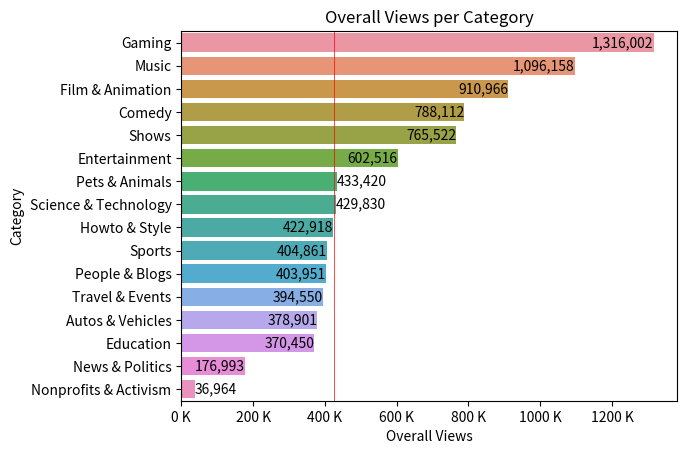

In [6]:
overall_view = data[['Category','Video ID','Views']].copy()
overall_view = overall_view.groupby(['Category','Video ID'])[['Views']].max().groupby('Category').median()
overall_view = overall_view.sort_values('Views',ascending=False)

x, y = overall_view['Views'], overall_view.reset_index()['Category'].values
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000:.0f} K'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center') if i < 6 else\
        plt.annotate(f'{val:,.0f}', xy=(val,i), ha='left', va='center') if i < 8 else\
            plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center') if i < 15 else\
                plt.annotate(f'{val:,.0f}', xy=(val,i), ha='left', va='center')

plt.axvline(overall_view['Views'].median(), color='red', linewidth=.5)
plt.ylabel('Category'), plt.xlabel('Overall Views')
plt.title('Overall Views per Category')

It can be seen visually that the size of the data center in each category is significantly different. This indicates that each category has different characteristics which can be caused by factors such as topics, production quality, release time, and the type of content used. The top six views per category which are above the average are dominated by entertainment categories, such as Gaming, Music, Film & Animation, Comedy, Shows, and Entertainment. On the other hand, the remaining categories are below the average. Interpretations that can be drawn are:
1. The high level of user interest caused by high attractiveness.

1. It is entertainment in nature so that it has a positive side for users.
1. Larger number of users.

Some of these factors are not absolute so more in-depth research is needed.

Text(0.5, 1.0, 'Top 10 Viewed Videos')

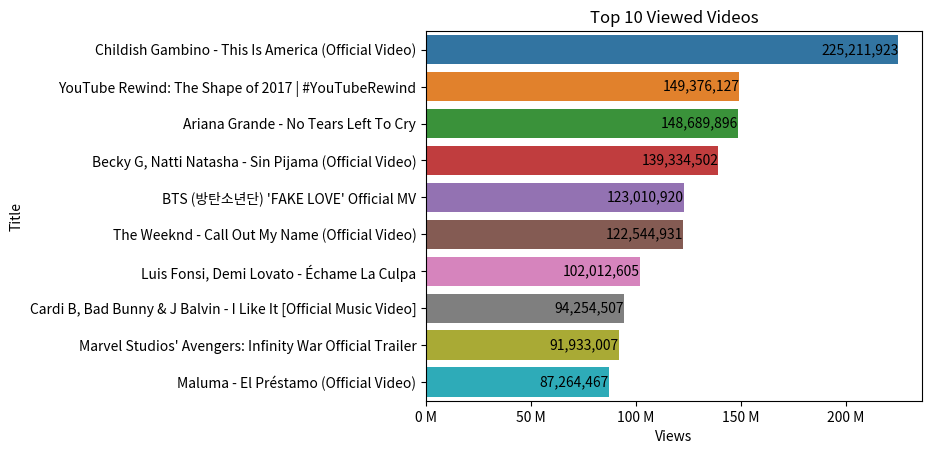

In [7]:
vid_topview = data.iloc[data.groupby('Video ID')['Trending Date'].idxmax()][['Title','Views']]
vid_topview = vid_topview.sort_values('Views',ascending=False).head(10)

x, y = vid_topview['Views'], vid_topview['Title']
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.0f} M'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center')

plt.title('Top 10 Viewed Videos')

Based on the top 10 views videos, all of them are dominated by entertainment content. This further reinforces that content with this theme needs to be reproduced in order to attract more potential viewers so that the generated traffic can increase all the time.

Text(0, 0.5, 'Channel')

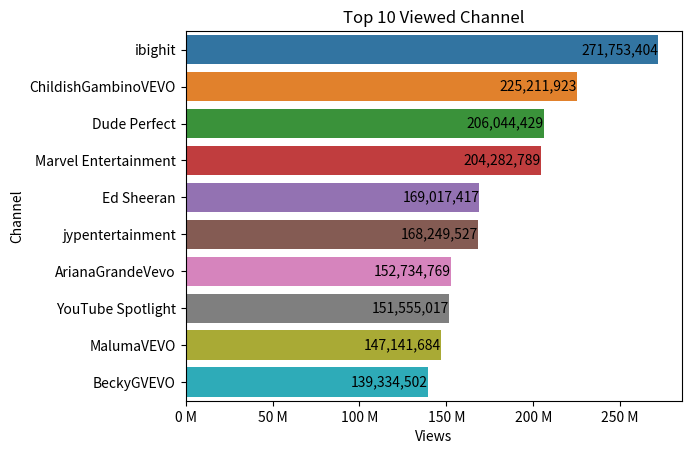

In [8]:
cha_topview = data.iloc[data.groupby(['Channel','Video ID'])['Trending Date'].idxmax()][['Channel','Views']]
cha_topview = cha_topview.groupby('Channel').sum().sort_values('Views',ascending=False).head(10)

x, y = cha_topview['Views'], cha_topview.index.values
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.0f} M'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center')

plt.title('Top 10 Viewed Channel')
plt.ylabel('Channel')

Several well-known content creators are identified from the total number of views such as ibighit which is an entertainment company from South Korea which was founded in 2005. **YouTube** needs to give sufficient appreciation to the channel owners and carry out an efficient optimization process to recommend their content to users who have appropriate preferences. This also applies to other top channels. Other recommendations that can be made are:

1. Give awards to content creators who have good performance, such as Silver Play Button, Gold Play Button, or Diamond Play Button. This award can provide a motivational boost for content creators to continue creating quality content.

1. Help content creators improve video quality by providing guidelines for improving the quality of their videos.
1. Provide promotional support for content that is considered to have great potential so as to help that content be more easily found by potential audiences.
1. Provide suggestions for improving performance so that it attracts more audiences.
1. Providing interesting features such as live streaming, premiere features, or other new features to make it more interactive with the audience.
1. Provide funding for content that is considered to have great potential so that the content will develop and attract more viewers.
1. Create mutually supportive content creator communities such as discussion groups or online forums. This can help content creators exchange experiences and suggestions to improve the quality of their content.

##### **Engagement Importance**

Engagement is a term used to describe the interaction between viewers and uploaded content. Engagement includes various things such as the number of likes, dislikes, and comments. Here the data will be filtered based on the feature availability status in the `Ratings Feature` and `Comments Feature` columns. In the early stages, the number of engagements in each video will be visualized to see the distribution and data center points.

Text(0.5, 0, 'Total Engagement')

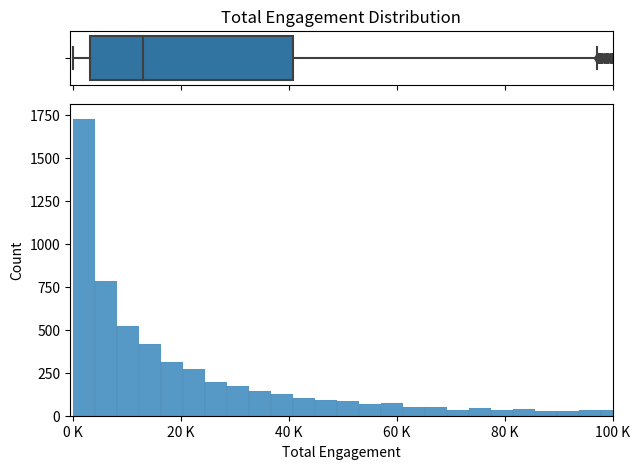

In [9]:
engagement_distribution = data[(data['Ratings Feature']=='Available') & (data['Comments Feature']=='Available')]\
    [['Video ID','Likes','Dislikes','Trending Date']].copy()
engagement_distribution['Total Engagement'] = engagement_distribution[['Likes','Dislikes']].apply(lambda x: x[0]+x[1],axis=1)
engagement_distribution = engagement_distribution.groupby('Video ID').max('Trending Date')

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[.7,4],'hspace':.1})
boxplot = sns.boxplot(x=engagement_distribution['Total Engagement'].values,ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Total Engagement Distribution')
histplot = sns.histplot(x=engagement_distribution['Total Engagement'].values,ax=axs[1])
histplot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000:.0f} K'))
plt.xlim(-500,100000)
plt.xlabel('Total Engagement')

Visually, the distribution does not follow a normal distribution. This indicates that there are influencing factors which on the other hand can also be a factor causing differences in the number of engagements in each category. Before that, it is necessary to carry out a normality test as an evaluation material.

In [10]:
stat, pvalue = kstest(
    engagement_distribution['Total Engagement'].values.reshape(-1),
    np.random.normal(
        engagement_distribution['Total Engagement'].values.mean(),
        engagement_distribution['Total Engagement'].values.std(),
        size=len(engagement_distribution['Total Engagement'].values.reshape(-1))
    )
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


Analysis of the number of engagement can find out how many viewers are engaged with the content. The higher the number, the more likely the content is in accordance with the interests of the audience. On the other hand, this analysis is used to measure how close the relationship between content owners and viewers is. With a good relationship, the audience will be routine and loyal to wait for every content that is launched.

Text(0.5, 0, 'Overall Engagement')

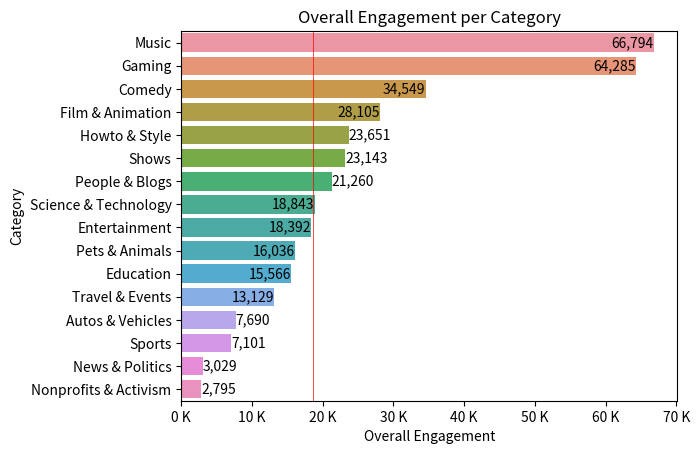

In [11]:
overall_engagement = data[['Category','Video ID','Likes','Comments']].copy()
overall_engagement['Total Engagement'] = overall_engagement[['Likes','Comments']].apply(lambda x: x[0]+x[1],axis=1)
overall_engagement = overall_engagement.groupby('Category')[['Total Engagement']].median().sort_values('Total Engagement',ascending=False)

x, y = overall_engagement['Total Engagement'].values, overall_engagement.reset_index()['Category']
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000:.0f} K'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center') if i < 4 else\
        plt.annotate(f'{val:,.0f}', xy=(val,i), ha='left', va='center') if i < 7 else\
            plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center') if i < 12 else\
                plt.annotate(f'{val:,.0f}', xy=(val,i), ha='left', va='center')

plt.axvline(overall_engagement['Total Engagement'].median(), color='red', linewidth=.5)
plt.title('Overall Engagement per Category')
plt.xlabel('Overall Engagement')

Based on the visualization above, it was found that content that has above average engagement is entertainment content. This is related to the probability that content in a certain category has a large number of views, the interactions made by viewers will also be comparable. **YouTube** needs to pay special attention to certain categories to increase the expected output.

Text(0.5, 1.0, 'Top 10 Engaging Videos')

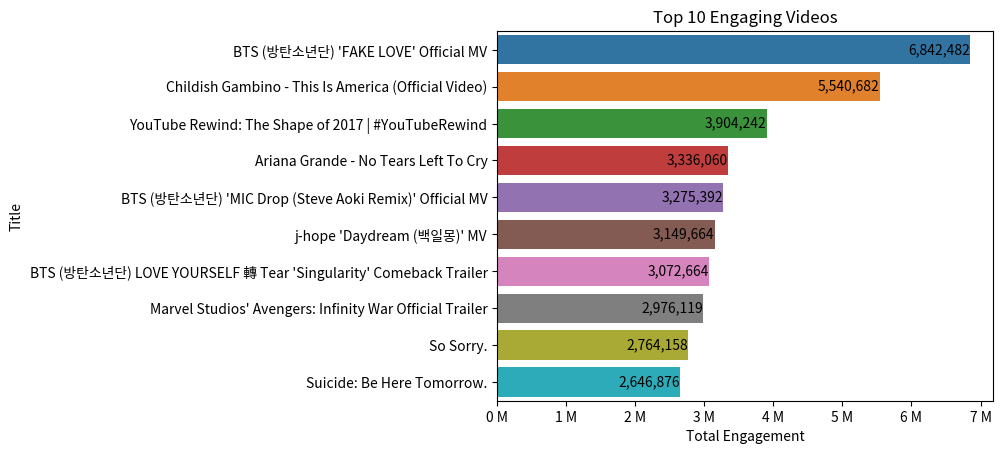

In [12]:
vid_topgage = data.iloc[data.groupby('Video ID')['Trending Date'].idxmax()][['Title','Likes','Comments']]
vid_topgage['Total Engagement'] = vid_topgage[['Likes','Comments']].apply(lambda x: x[0]+x[1],axis=1)
vid_topgage = vid_topgage.sort_values('Total Engagement',ascending=False).head(10)

x, y = vid_topgage['Total Engagement'], vid_topgage['Title']
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.0f} M'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center')

plt.xlabel('Total Engagement')
plt.title('Top 10 Engaging Videos')

The series of videos with the highest engagement is still controlled by the entertainment industry. Some of them are video clips from boyband BTS and the rest are music content from top foreign musicians. It should be emphasized that musical content really attracts the interest of the audience, which is likely to be loyal fans, plus the object popularity of the content. This high engagement indicates that the audience is actively involved in the discussion or interaction in the video.

Text(0, 0.5, 'Channel')

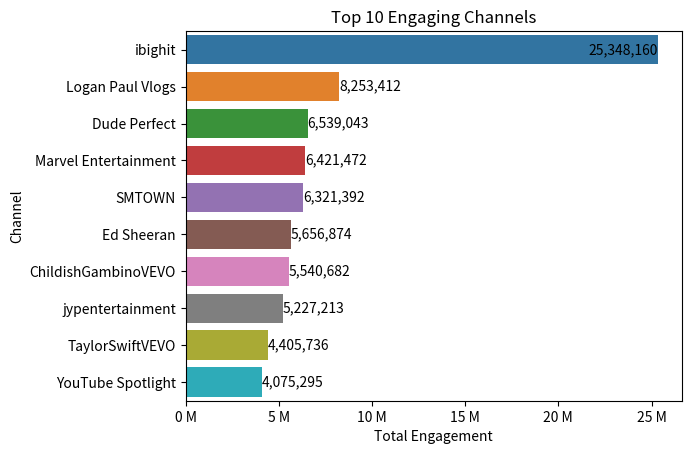

In [13]:
cha_topgage = data.iloc[data.groupby(['Channel','Video ID'])['Trending Date'].idxmax()][['Channel','Likes','Comments']]
cha_topgage['Total Engagement'] = cha_topgage[['Likes','Comments']].apply(lambda x: x[0]+x[1],axis=1)
cha_topgage = cha_topgage.groupby('Channel').sum().sort_values('Total Engagement',ascending=False).head(10)

x, y = cha_topgage['Total Engagement'], cha_topgage.index.values
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.0f} M'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f}', xy=(val,i), ha='right', va='center') if i < 1 else\
        plt.annotate(f'{val:,.0f}', xy=(val,i), ha='left', va='center')

plt.title('Top 10 Engaging Channels')
plt.ylabel('Channel')

Quality content and potential value are based on the owner and developer factors of the video channel. **YouTube** needs to issue a number of recommendations in order to increase the interaction provided by loyal viewers and new viewers, including:

1. Provide facilities for direct interaction such as live streaming. Loyal viewers will be very willing to enjoy content from their idols so that the resulting traffic will be maintained.

1. Several channels with the most popular content need to be given a special space without having to block other channels. This is so that the channel owner can continue to maintain the content they produce and continue to attract new viewers who have not been reached through the recommendation system.
1. Provide analytical and statistical tools that can help channel owners to analyze the performance of their channel and content so that it becomes an evaluation material for making further content.
1. With these recommendations, **YouTube** can help content creators to increase engagement on their channels and increase audience engagement on platform.

##### **Growth Analysis**

Growth Analysis is a process of measuring and evaluating the growth of an aspect. This analysis can provide valuable information to improve **YouTube** service performance and predict future growth. By knowing the growth trends in each category, **YouTube** can determine a priority scale to make recommendations regarding which industries are currently popular.

Text(0.5, 1.0, 'Growth Trends of Top 6 Viewed Videos')

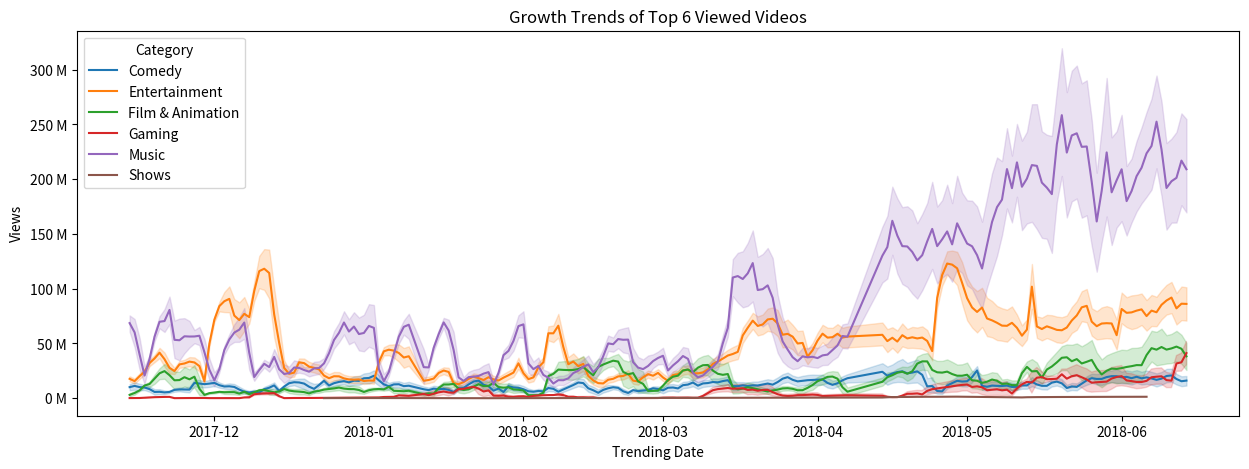

In [14]:
growth = data[['Category','Trending Date','Views','Likes','Comments']].copy()
grouped = growth.groupby(['Category','Trending Date'])[['Views','Likes','Comments']].cumsum()
growth[['Views','Likes','Comments']] = grouped
growth = growth.groupby(['Category','Trending Date'],group_keys=True).apply(lambda x: x[['Views','Likes','Comments']]).reset_index()
cat_topview = growth[growth['Category'].isin(overall_view.head(6).index.values)].copy()

plt.figure(figsize=(15,5))
lineplot = sns.lineplot(cat_topview,x='Trending Date',y='Views',hue='Category')
lineplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.0f} M'))
lineplot.set_title('Growth Trends of Top 6 Viewed Videos')

Based on the total views of the top six categories, it can be seen that the Music and Entertainment categories experienced the most significant growth. This indicates a significant increase in user demand for content related to that category.

Text(0.5, 1.0, 'Growth Trends of Top 6 Engaging Videos')

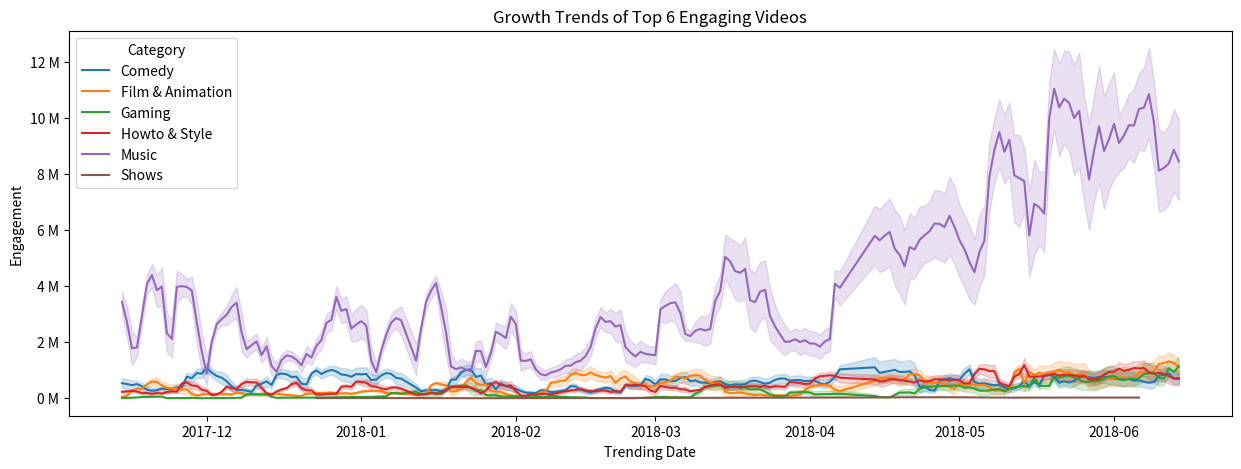

In [15]:
cat_topgage = growth[growth['Category'].isin(overall_engagement.head(6).index.values)].copy()
cat_topgage['Engagement'] = cat_topgage[['Likes','Comments']].apply(lambda x: x[0]+x[1],axis=1)

plt.figure(figsize=(15,5))
lineplot = sns.lineplot(cat_topgage,x='Trending Date',y='Engagement',hue='Category')
lineplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/1000000:.0f} M'))
lineplot.set_title('Growth Trends of Top 6 Engaging Videos')

The number of engagement shows a very significant growth in the Music category. This industry has the potential to see the enthusiasm of users who actively participate in providing feedback. Therefore, it is highly recommended that **YouTube** continues to encourage and support the global music industry in order to attract new potential audiences as a top priority regardless of other videographic industries. With the growing number of views and engagement, it will be easier for the recommendations given to be widely accepted. This needs to be proven by measuring the correlation between the two things using correlation analysis techniques.

<Axes: >

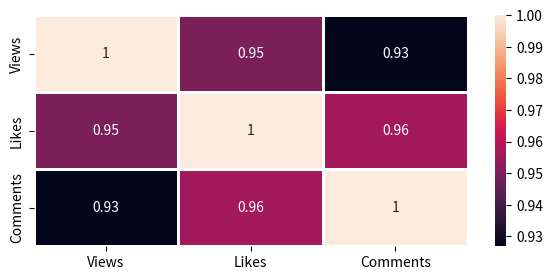

In [16]:
plt.figure(figsize=(7,3))
sns.heatmap(growth[['Views','Likes','Comments']].corr(method='spearman'),annot=True,linewidths=2)

Based on the correlation analysis above, it can be concluded that the number of views has a positive and significant correlation to the number of likes and comments. Therefore, the previous statement can be considered valid.

##### **Engagement Rate Trends**

After understanding the significant relationship between the number of views and engagement. We will try to analyze turnover from each increase in views to the number of engagements in terms of engagement rate. First of all, this analysis gives you a quick look at the top 10 engagement videos and how they've grown over time.

(Text(0.5, 0, 'Day'), Text(0, 0.5, 'Engagement Rate (%)'))

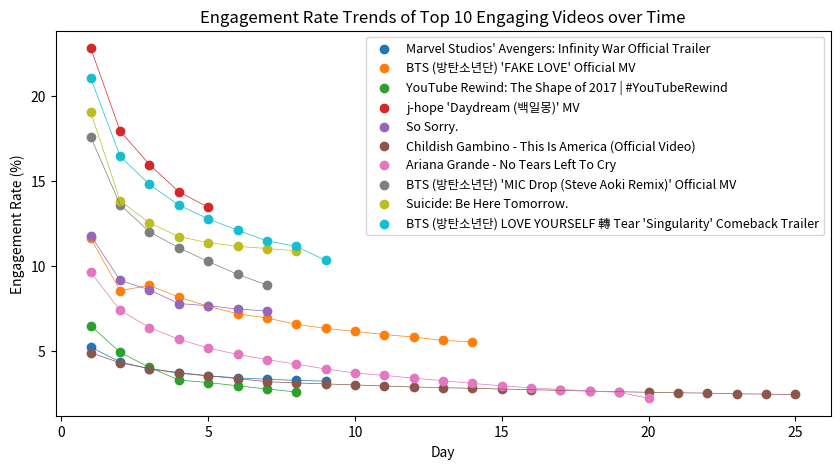

In [17]:
timeseries = data.groupby('Video ID',group_keys=True).apply(lambda x: x[['Trending Date','Title','Engagement Rate (%)']]).reset_index()
ordlist = []

for i in timeseries['Video ID'].unique():
    length = len(timeseries[timeseries['Video ID']==i]['Trending Date'])
    ordlist.append(list(range(1,length+1)))

timeseries['Day'] = [day for sublist in ordlist for day in sublist]
top_timeseries = timeseries[timeseries['Title'].isin(vid_topgage['Title'].values)]

f, a = plt.subplots(figsize=(10,5))

for i in top_timeseries['Video ID'].unique():
    lineplot = sns.lineplot(x=top_timeseries[top_timeseries['Video ID']==i]['Day'], 
                            y=top_timeseries[top_timeseries['Video ID']==i]['Engagement Rate (%)'],
                            linewidth=.5)
    a.scatter(top_timeseries[top_timeseries['Video ID']==i]['Day'], 
              top_timeseries[top_timeseries['Video ID']==i]['Engagement Rate (%)'],
              label=top_timeseries[top_timeseries['Video ID']==i]['Title'].unique()[0])
    a.legend(fontsize=9)

a.set_title('Engagement Rate Trends of Top 10 Engaging Videos over Time')
a.set_xlabel('Day'), a.set_ylabel('Engagement Rate (%)')

It can be seen visually that videos with the highest engagement level have a tendency to decline. This indicates that engagement rate will saturate over time even though the number of views and engagement continues to grow. That way, before arriving at correlation analysis, we can assume that engagement rate will continue to decrease all the time trending.

<Axes: >

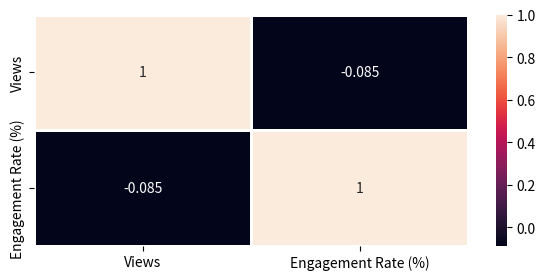

In [18]:
decline = data[['Trending Date','Views']].copy()
grouped = decline.groupby(['Trending Date'])[['Views']].cumsum()
decline['Views'] = grouped
decline['Engagement Rate (%)'] = data['Engagement Rate (%)']
decline = decline.groupby('Trending Date',group_keys=True).apply(lambda x: x[['Views','Engagement Rate (%)']]).reset_index()

plt.figure(figsize=(7,3))
sns.heatmap(decline[['Views','Engagement Rate (%)']].corr(method='spearman'),annot=True,linewidths=2)

Based on correlation analysis, there is a negative relationship between the number of views and engagement rate of 8.5%. That means that every significant increase in the number of views will be accompanied by a small increase in the number of engagements. This is a phenomenon that does not apply absolutely and only provides a general response from views and engagement intercorrelation.

##### **Decline in Engagement Rate**

That way, we will discuss this phenomenon in depth according to the scope of our data. First of all, it is necessary to analyze the distribution of the data.

(-0.05, 5.0)

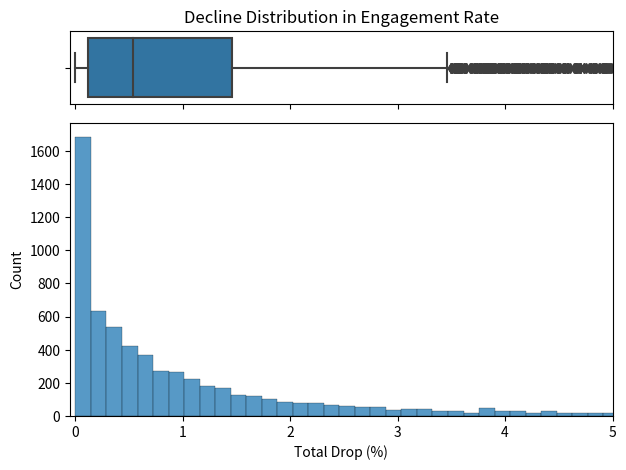

In [19]:
drop = timeseries.copy()
drop['Max'] = drop.groupby('Video ID')['Engagement Rate (%)'].transform('max')
drop['Min'] = drop.groupby('Video ID')['Engagement Rate (%)'].transform('min')
drop['Drop'] = drop[['Max','Min']].apply(lambda x: x[0]-x[1],axis=1)
drop = drop[['Video ID','Drop']].drop_duplicates(keep='first')

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[1,4],'hspace':.1})
boxplot = sns.boxplot(x=drop['Drop'],ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Decline Distribution in Engagement Rate')
histplot = sns.histplot(x=drop['Drop'],ax=axs[1])
histplot.set_xlabel('Total Drop (%)')
plt.xlim(-.05,5)

It can be seen that the decline for each video is concentrated between zero and two percent. Even though in reality, there are a small number of videos that have a magnitude outside of this value. At first glance, the data does not form a normal distribution, but the calculation process in statistical tests needs to be done to fulfill this assumption.

In [20]:
stat, pvalue = kstest(
    drop['Drop'].values.reshape(-1),
    np.random.normal(drop['Drop'].mean(),drop['Drop'].std(),
    size=len(drop['Drop'].values.reshape(-1)))
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


The decline distribution is not normal or symmetric. Therefore, we can use the median as a measure of data center to investigate further based on its causality across all categories.

Text(0.5, 1.0, 'Overall Decline per Category')

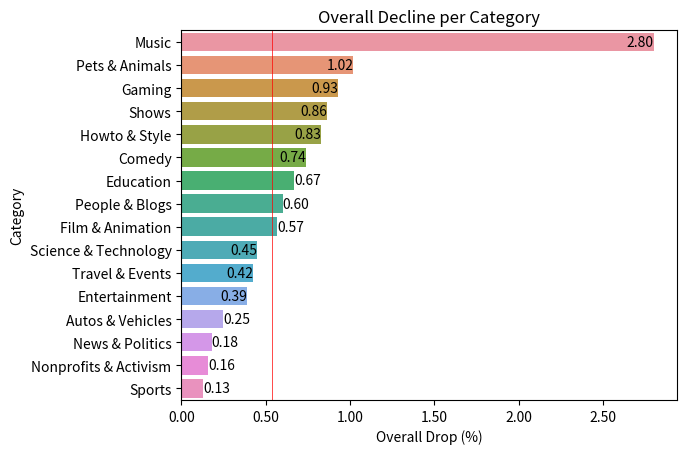

In [21]:
overall_drop = data.groupby(['Category','Video ID']).apply(lambda x: x['Engagement Rate (%)']).reset_index()
overall_drop['Max'] = overall_drop.groupby(['Category','Video ID'])['Engagement Rate (%)'].transform('max')
overall_drop['Min'] = overall_drop.groupby(['Category','Video ID'])['Engagement Rate (%)'].transform('min')
overall_drop['Drop'] = overall_drop[['Max','Min']].apply(lambda x: x[0]-x[1],axis=1)
overall_drop = overall_drop[['Category','Video ID','Drop']].drop_duplicates(keep='first').groupby('Category')['Drop'].median()

x, y = overall_drop.sort_values(ascending=False).values, overall_drop.sort_values(ascending=False).index.values
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x:.2f}'))

for i, val in enumerate(x):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center') if i < 6 else\
        plt.annotate(f'{val:,.2f}', xy=(val,i), ha='left', va='center') if i < 9 else\
            plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center') if i < 12 else\
                plt.annotate(f'{val:,.2f}', xy=(val,i), ha='left', va='center')

plt.axvline(drop['Drop'].median(), color='red', linewidth=.5)
plt.xlabel('Overall Drop (%)'), plt.ylabel('Category')
plt.title('Overall Decline per Category')

It can be seen that several categories with a very dominant number of views in the previous discussion, have drop percentage values ​​above the average. This is quite logical considering that one of the categories, namely Music which has a significant growth in the number of views, will not always get an increase in the number of engagement in addition to views with several factors as follows:
1. The recommended content doesn't appeal to new audiences. This can be due to a lack of market research or a lack of proper content planning.

1. Poor video quality can cause viewers not to be interested in watching and interacting with videos.
1. Not so efficient recommendation algorithm.

That way we'll try to take a closer look at the 10 videos with the most views.

Text(0.5, 0, 'Drop (%)')

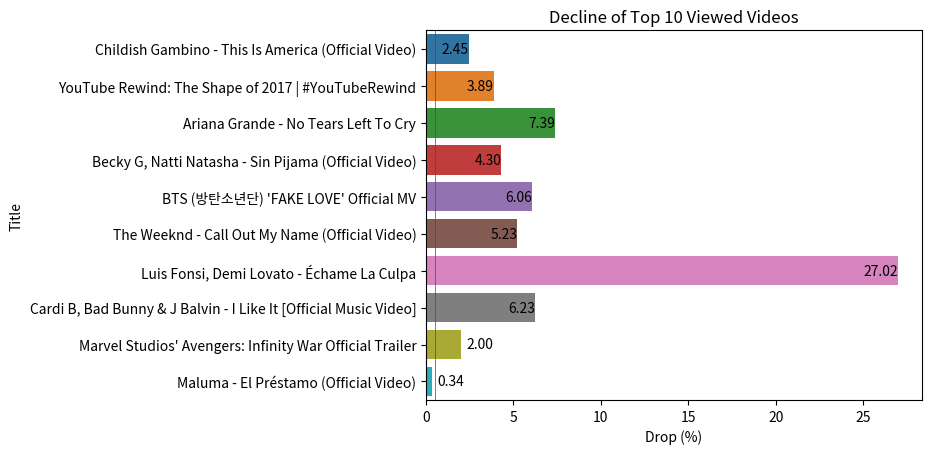

In [22]:
position = {title: i for i, title in enumerate(vid_topview['Title'].values)}
data['Position'] = data['Title'].map(position)
topview_decline = data.loc[data['Title'].isin(vid_topview['Title'].values)][['Title','Engagement Rate (%)','Position']]
topview_decline['Max'] = topview_decline.groupby('Title')['Engagement Rate (%)'].transform('max')
topview_decline['Min'] = topview_decline.groupby('Title')['Engagement Rate (%)'].transform('min')
topview_decline['Drop'] = topview_decline[['Max','Min']].apply(lambda x: x[0]-x[1],axis=1)
topview_decline = topview_decline[['Title','Drop','Position']].drop_duplicates(keep='first')
topview_decline = topview_decline.groupby('Title')[['Drop','Position']].min().sort_values('Position').reset_index()

x, y = topview_decline['Drop'], topview_decline['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center') if i < 8 else\
        plt.annotate(f'{val:,.2f}', xy=(val+.3,i), ha='left', va='center')

plt.axvline(drop['Drop'].median(), color='red', linewidth=.5)
plt.title('Decline of Top 10 Viewed Videos')
plt.xlabel('Drop (%)')

It can be seen that the risk of declining on engagement rate is quite large for the most popular videos. Next, we will analyze the 10 videos with the most engagements.

Text(0.5, 0, 'Drop (%)')

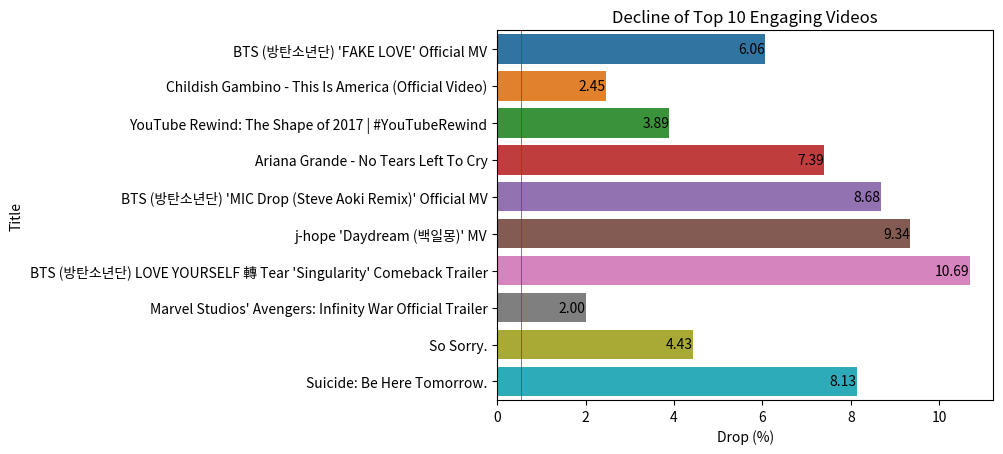

In [23]:
position = {title: i for i, title in enumerate(vid_topgage['Title'].values)}
data['Position'] = data['Title'].map(position)
topgage_decline = data.loc[data['Title'].isin(vid_topgage['Title'].values)][['Title','Engagement Rate (%)','Position']]
topgage_decline['Max'] = topgage_decline.groupby('Title')['Engagement Rate (%)'].transform('max')
topgage_decline['Min'] = topgage_decline.groupby('Title')['Engagement Rate (%)'].transform('min')
topgage_decline['Drop'] = topgage_decline[['Max','Min']].apply(lambda x: x[0]-x[1],axis=1)
topgage_decline = topgage_decline[['Title','Drop','Position']].drop_duplicates(keep='first')
topgage_decline = topgage_decline.groupby('Title')[['Drop','Position']].min().sort_values('Position').reset_index()

x, y = topgage_decline['Drop'], topgage_decline['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center')

plt.axvline(drop['Drop'].median(), color='red', linewidth=.5)
plt.title('Decline of Top 10 Engaging Videos')
plt.xlabel('Drop (%)')

It can be seen that the videos with the most engagements have also experienced a significant decline so that they are well above the average. We can conclude this as a certainty that no video can last forever on the trending list because new videos will always appear and competition is getting tougher in the creative industry. Therefore, **YouTube** as a service provider must continue to develop the most efficient algorithm in recommending a new video with a certain priority scale.

##### **Days-to-Trending**

Days-to-trending is a metric used to measure the time it takes for a video to enter the trending list on **YouTube**. The calculation is done by calculating the difference between the date the video was uploaded and the date the video was first trending. First of all, we will analyze the overall distribution of the data.

Text(0.5, 0, 'Days-to-Trending (Days)')

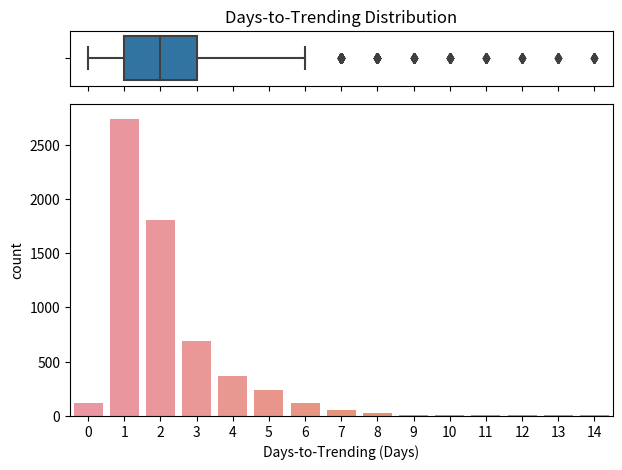

In [24]:
days_toTrending = data[['Video ID','Title','Channel','Category','Publish Date','Trending Date']].copy()
days_toTrending['Days'] = days_toTrending[['Publish Date','Trending Date']].apply(lambda x : x[1].toordinal()-x[0].toordinal(),axis=1)
days_distribution = days_toTrending.groupby('Video ID')['Days'].min()

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[.7,4],'hspace':.1})
boxplot = sns.boxplot(x=days_distribution.values,ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Days-to-Trending Distribution')
countplot = sns.countplot(x=days_distribution.values,ax=axs[1])
plt.xlim(-.5,14.5)
plt.xlabel('Days-to-Trending (Days)')

Visually, it can be seen that the data is concentrated between 1 to 3 days. Even so, there are a few that take a long time to trend so that the data is not normally distributed. Next, we will use the median to measure the data center point in each category.

In [25]:
stat, pvalue = kstest(
    days_distribution.values.reshape(-1),
    np.random.normal(
        days_distribution.values.mean(),
        days_distribution.values.std(),
        size=len(days_distribution.values.reshape(-1))
    )
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


It is proved that the data is not normally distributed. Next, we will use the median to measure the data center point in each category.

Text(0.5, 0, 'Days-to-Trending (Days)')

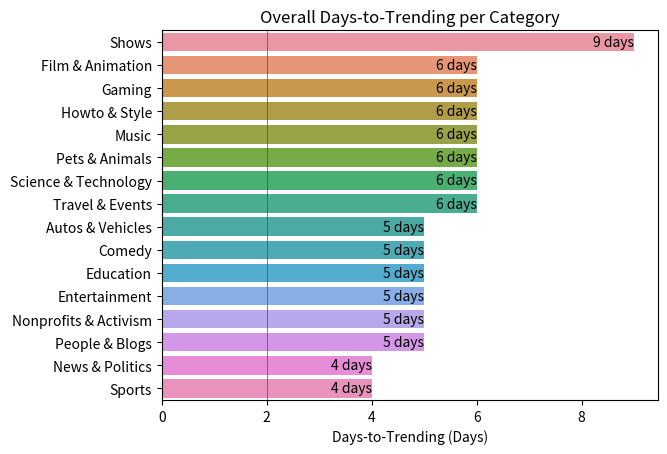

In [26]:
overall_days_toTrending = days_toTrending.groupby('Category')['Days'].median().sort_values(ascending=False)

x, y = overall_days_toTrending.values, overall_days_toTrending.index.values
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f} days', xy=(val,i), ha='right', va='center')

plt.axvline(days_distribution.median(), color='red', linewidth=.5)
plt.title('Overall Days-to-Trending per Category')
plt.xlabel('Days-to-Trending (Days)')

In all **YouTube** service categories, it can be seen that the data center point is above the average. This explains that the varying amount of time required for a video to enter the trending list and is not a guarantee that a video that has been uploaded for a long time will not be trending which may be due to time and events. Sometimes there is a video that is just being discussed when the incident related to the video occurs at a different time.

Text(0.5, 0, 'Days-to-Trending (Days)')

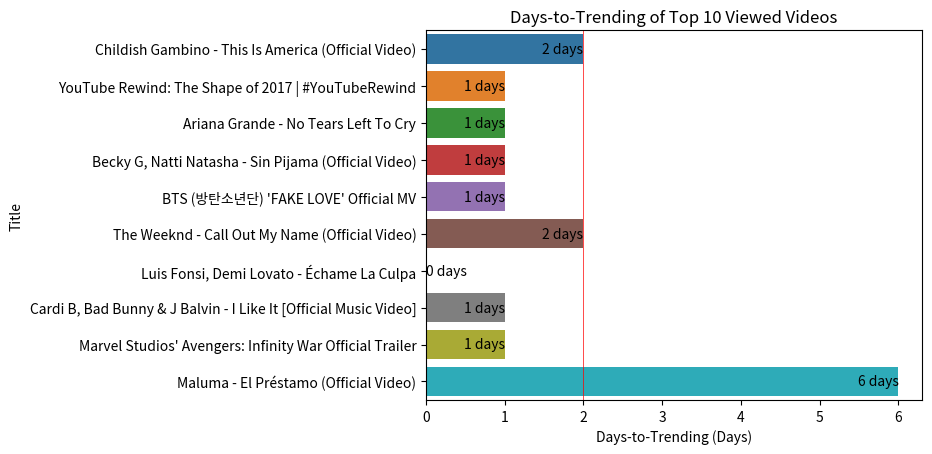

In [27]:
position = {title: i for i, title in enumerate(vid_topview['Title'].values)}
data['Position'] = data['Title'].map(position)
topview_days = data.loc[data['Title'].isin(vid_topview['Title'].values)][['Title','Publish Date','Trending Date','Position']]
topview_days['Days'] = topview_days[['Publish Date','Trending Date']].apply(lambda x : x[1].toordinal()-x[0].toordinal(),axis=1)
topview_days = topview_days.groupby('Title')[['Days','Position']].min().sort_values('Position').reset_index()

x, y = topview_days['Days'], topview_days['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f} days', xy=(val,i), ha='right', va='center') if i < 6 else\
        plt.annotate(f'{val:,.0f} days', xy=(val,i), ha='left', va='center') if i < 7 else\
            plt.annotate(f'{val:,.0f} days', xy=(val,i), ha='right', va='center')

plt.axvline(days_distribution.median(), color='red', linewidth=.5)
plt.title('Days-to-Trending of Top 10 Viewed Videos')
plt.xlabel('Days-to-Trending (Days)')

Even so, the determining pattern for a video to enter the trending list can be found clearly based on the number of views that are most dominant. There is a tendency for videos in certain categories, such as Music, to trend faster because there is already a large market of users or in other words loyal viewers.

Text(0.5, 0, 'Days-to-Trending (Days)')

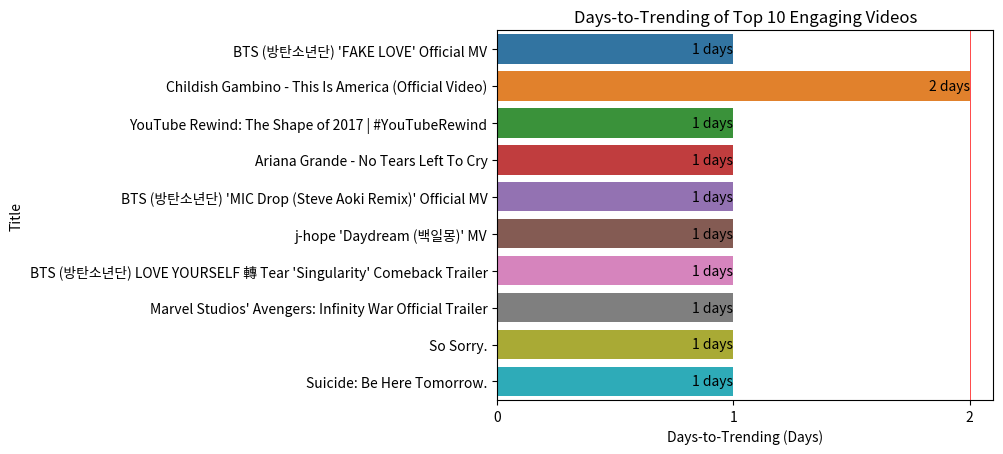

In [28]:
position = {title: i for i, title in enumerate(vid_topgage['Title'].values)}
data['Position'] = data['Title'].map(position)
topgage_days = data.loc[data['Title'].isin(vid_topgage['Title'].values)][['Title','Publish Date','Trending Date','Position']]
topgage_days['Days'] = topgage_days[['Publish Date','Trending Date']].apply(lambda x : x[1].toordinal()-x[0].toordinal(),axis=1)
topgage_days = topgage_days.groupby('Title')[['Days','Position']].min().sort_values('Position').reset_index()

x, y = topgage_days['Days'], topgage_days['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.0f} days', xy=(val,i), ha='right', va='center')

plt.axvline(days_distribution.median(), color='red', linewidth=.5)
plt.xticks([0,1,2])
plt.title('Days-to-Trending of Top 10 Engaging Videos')
plt.xlabel('Days-to-Trending (Days)')

Then for videos with the most dominant interests it will also be easier to enter the trending list in a relatively short time. Based on these findings, it is necessary to have sustainable viewers who are loyal and consistent in consuming video content presented by content creators. Maintaining sustainable viewers is very important because they can help increase engagement rate and views of videos. Apart from that, they can also help increase brand awareness and create a loyal community.

##### **Trending Duration**

Trending on **YouTube** refers to videos or content that are currently popular at a particular moment. Trending is calculated based on a number of factors, including the number of views, level of engagement, and speed of growth of views. **YouTube** has a special section for content that is trending, which users can see when opening the main page or doing a search on the platform. We will try to analyze the duration distribution of each trending video.

Text(0.5, 0, 'Duration (Days)')

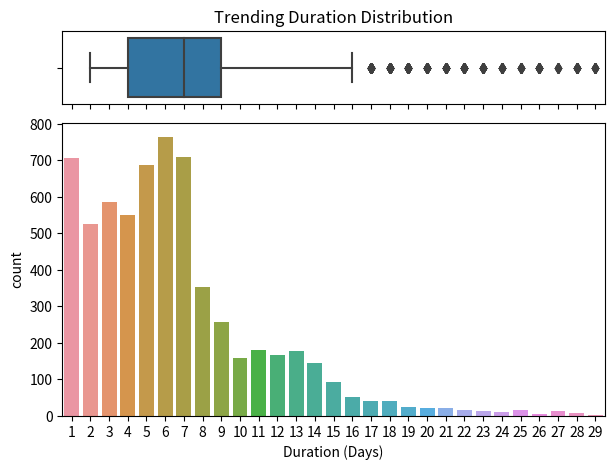

In [29]:
duration_distribution = data.groupby('Video ID').agg(Duration=('Trending Date','nunique'))

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[1,4],'hspace':.1})
boxplot = sns.boxplot(x=duration_distribution['Duration'], ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Trending Duration Distribution')
countplot = sns.countplot(x=duration_distribution['Duration'], ax=axs[1])
countplot.set_xlabel('Duration (Days)')

It can be seen that the duration for each video tends not to be normally distributed with concentration levels ranging from 4 to 8 days. For this reason, we will first carry out statistical tests to meet these assumptions.

In [30]:
stat, pvalue = kstest(
    duration_distribution.values.reshape(-1),
    np.random.normal(
        duration_distribution.values.mean(),
        duration_distribution.values.std(),
        size=len(duration_distribution.values.reshape(-1))
    )
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


Text(0.5, 0, 'Duration (Days)')

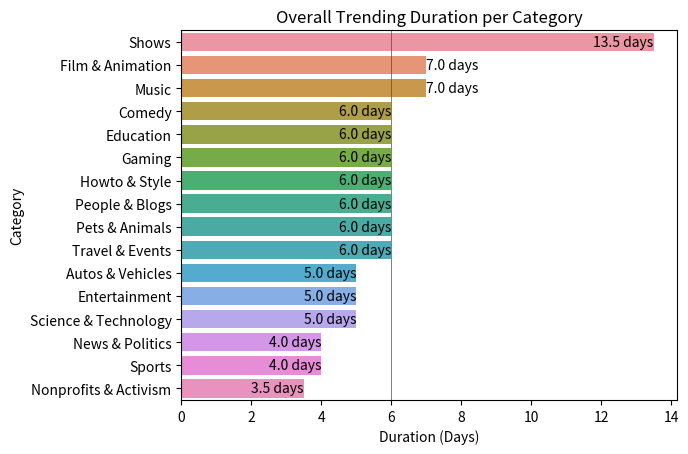

In [31]:
overall_duration = data.groupby(['Category','Video ID']).agg(Duration=('Trending Date','nunique')).groupby('Category').median()
overall_duration = overall_duration.reset_index().sort_values('Duration',ascending=False)

x, y = overall_duration['Duration'], overall_duration['Category']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:.1f} days', xy=(val,i), ha='right', va='center') if i < 1 else\
        plt.annotate(f'{val:.1f} days', xy=(val,i), ha='left', va='center') if i < 3 else\
            plt.annotate(f'{val:.1f} days', xy=(val,i), ha='right', va='center')

plt.axvline(duration_distribution['Duration'].median(), color='red', linewidth=.5)
plt.title('Overall Trending Duration per Category')
plt.xlabel('Duration (Days)')

Visually, it can be seen that the data center points for duration in each category are mostly around the mean value. Even so, there is an exception in the Music category, which is 13.5 days. This is based on the interest factor and segmentation of users who are loyal to enjoying content based on that category.

Text(0.5, 0, 'Duration (Days)')

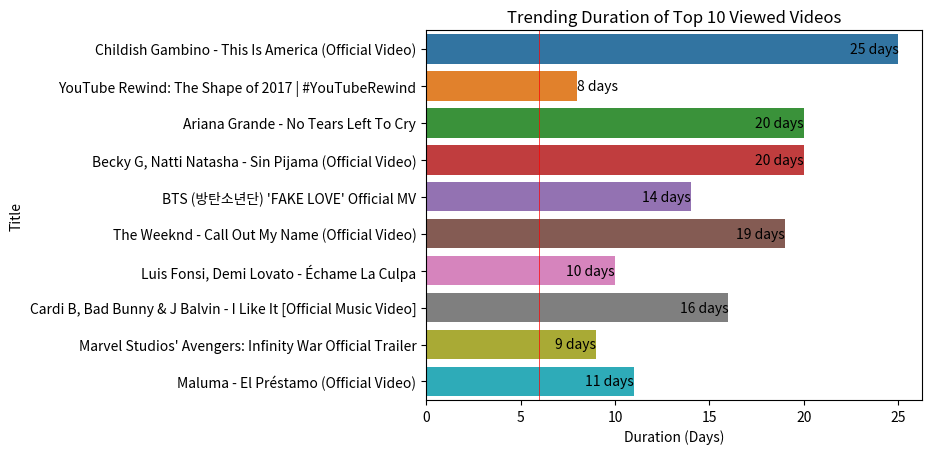

In [32]:
position = {title: i for i, title in enumerate(vid_topview['Title'].values)}
data['Position'] = data['Title'].map(position)
topview_duration = data[data['Title'].isin(vid_topview['Title'].values)].groupby(['Title','Position']).agg(Duration=('Trending Date','nunique'))
topview_duration = topview_duration.reset_index().sort_values('Position')

x, y = topview_duration['Duration'], topview_duration['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:.0f} days', xy=(val,i), ha='right', va='center') if i < 1 else\
        plt.annotate(f'{val:.0f} days', xy=(val,i), ha='left', va='center') if i < 2 else\
            plt.annotate(f'{val:.0f} days', xy=(val,i), ha='right', va='center')

plt.axvline(duration_distribution['Duration'].median(), color='red', linewidth=.5)
plt.title('Trending Duration of Top 10 Viewed Videos')
plt.xlabel('Duration (Days)')

It can also be seen that several videos with the most dominant views have a longer duration than the general average. This is because videos with a large number of views have the potential to continue to get engagement and attract interest from new potential viewers so traffic will be maintained.

Text(0.5, 0, 'Duration (Days)')

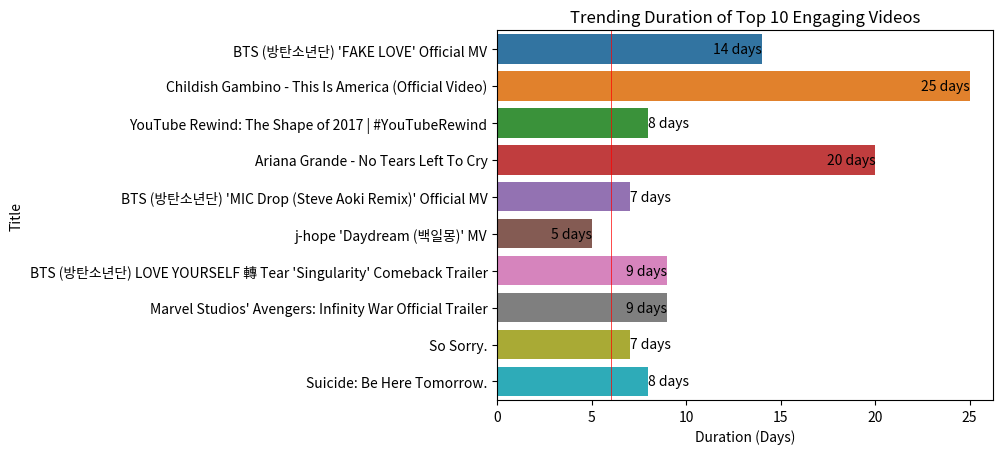

In [33]:
position = {title: i for i, title in enumerate(vid_topgage['Title'].values)}
data['Position'] = data['Title'].map(position)
topgage_duration = data[data['Title'].isin(vid_topgage['Title'].values)].groupby(['Title','Position']).agg(Duration=('Trending Date','nunique'))
topgage_duration = topgage_duration.reset_index().sort_values('Position')

x, y = topgage_duration['Duration'], topgage_duration['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:.0f} days', xy=(val,i), ha='right', va='center') if i < 2 else\
        plt.annotate(f'{val:.0f} days', xy=(val,i), ha='left', va='center') if i < 3 else\
            plt.annotate(f'{val:.0f} days', xy=(val,i), ha='right', va='center') if i < 4 else\
                plt.annotate(f'{val:.0f} days', xy=(val,i), ha='left', va='center') if i < 5 else\
                    plt.annotate(f'{val:.0f} days', xy=(val,i), ha='right', va='center') if i < 8 else\
                        plt.annotate(f'{val:.0f} days', xy=(val,i), ha='left', va='center')

plt.axvline(duration_distribution['Duration'].median(), color='red', linewidth=.5)
plt.title('Trending Duration of Top 10 Engaging Videos')
plt.xlabel('Duration (Days)')

Furthermore, for several videos with the most dominant engagement, they get a portion of duration around the average with the exception of a handful of videos which are caused by external factors which may be in the form of videographic quality or the theme of the content contained. Release time is also one of the reasons why the video can stay on the trending list for a long time.

##### **Video Quality**

The quality of a video in this discussion is based on engagement rate which develops every time it is trending. The quality of a video can change depending on how big the effect of decline is received. Therefore, the categorization will be made with the following provisions:

1. If it is more than equal to 15%, then the quality is Excellent.

1. If between 3% and 15%, then the quality is Good.
1. If it is between 1% and 3%, then the quality is Fair.
1. If it is below 1%, then the quality is Poor.

Text(0.5, 1.0, 'Video Quality Density on Duration')

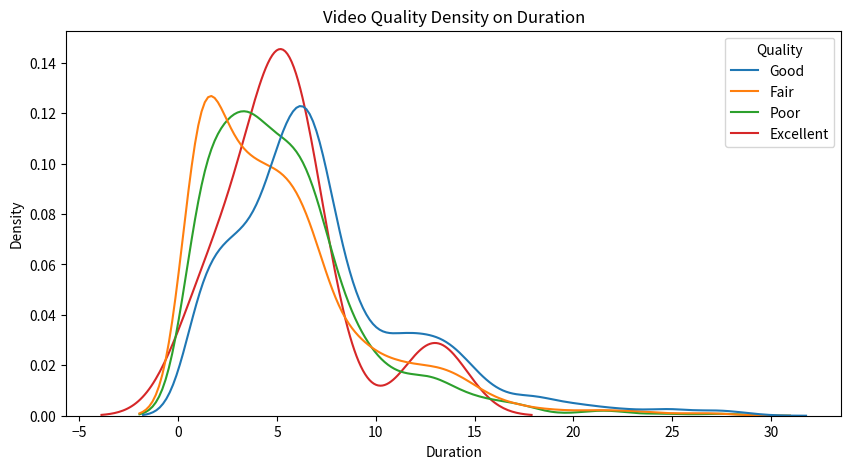

In [34]:
end_quality = data[['Title','Quality','Engagement Rate (%)','Trending Date']].copy()
duration = end_quality.groupby('Title').agg(Duration=('Trending Date','nunique')).reset_index()
end_quality = end_quality.merge(duration, on='Title', how='inner')
end_quality = end_quality.groupby(['Title','Quality']).max('Trending Date').reset_index().drop_duplicates('Title',keep='last')

plt.figure(figsize=(10,5))
sns.kdeplot(end_quality,x='Duration',hue='Quality',common_norm=False)
plt.title('Video Quality Density on Duration')

The visualization above provides a general description of the duration density of a video based on each quality category. It can be seen that the difference is not too significant for videos with quality from the best to the worst. Videos with excellent and good quality tend to have a longer trending duration than videos with fair and poor quality.

<Axes: >

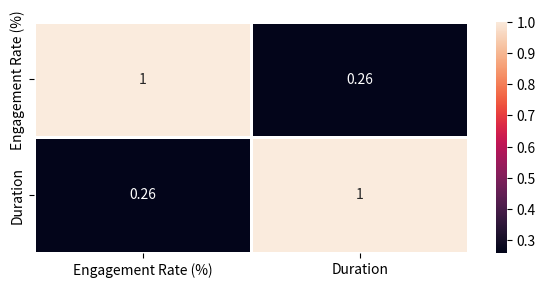

In [35]:
plt.figure(figsize=(7,3))
sns.heatmap(end_quality[['Engagement Rate (%)','Duration']].corr(method='spearman'),annot=True,linewidths=2)

It can be seen that there is no significant correlation between the quality of a video and trending duration so that it is not the main factor for categorizing quality based on engagement rate because it has a blurry boundary to be recognized. Even so, we will try to do a proportional visualization for each quality as a whole.

In [36]:
import plotly.express as px
import pandas as pd

quality = data.groupby(['Video ID'],group_keys=True).apply(lambda x: x[['Quality','Trending Date']]).reset_index()
quality = pd.DataFrame(quality.groupby('Video ID')[['Video ID','Quality','Trending Date']].transform('max').value_counts())
quality = quality.reset_index()[['Video ID','Quality']]

pie = px.pie(
    pd.DataFrame(quality['Quality'].value_counts()).reset_index(), 
    values=pd.DataFrame(quality['Quality'].value_counts()).reset_index()['count'],
    names=pd.DataFrame(quality['Quality'].value_counts()).reset_index()['Quality']
)

pie.update_layout(title='Video Quality Proportion',width=500,height=450)
pie.show()

End-product quality of a video is dominated by videos with good quality with a total share of around 57% and the rest is occupied by fair and poor quality videos with very few portions of excellent quality videos. Therefore, it is very difficult to use a nominal reference for engagement rate where the value tends to decrease over time due to the decline factor experienced by each video.

##### **Sentiment Ratio**

Sentiment ratio refers to the ratio of positive and negative sentiments expressed in a video. This ratio is calculated by dividing the number of negative sentiments by the positive sentiments expressed. Sentiment ratio can assist in evaluating audience response and can be used to measure the popularity or success of a product, brand, or campaign embedded in a circulating video. We will first perform a visualization to see the distribution of the data and the size of the data center.

(-0.1, 20.0)

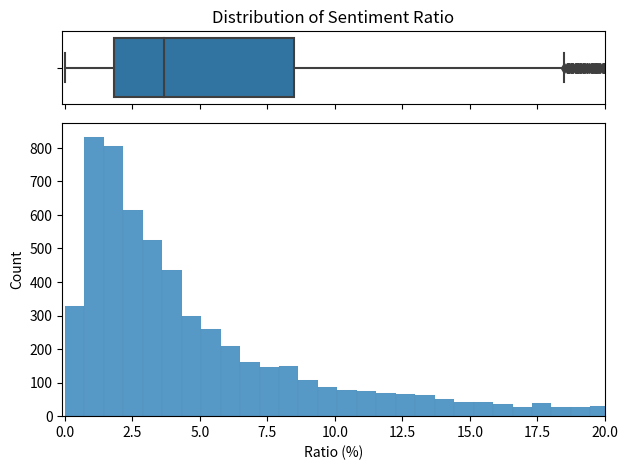

In [37]:
sentiment = data[(data['Ratings Feature']=='Available') & (data['Likes']!=0)][['Video ID','Title','Trending Date','Likes','Dislikes']].copy()
sentiment = sentiment.groupby(['Video ID','Title']).max('Trending Date')
sentiment['Ratio'] = sentiment[['Likes','Dislikes']].apply(lambda x: round((x[1]/x[0])*100,2),axis=1)

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[1,4],'hspace':.1})
boxplot = sns.boxplot(x=sentiment['Ratio'], ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Distribution of Sentiment Ratio')
histplot = sns.histplot(x=sentiment['Ratio'], ax=axs[1])
histplot.set_xlabel('Ratio (%)')
plt.xlim(-.1,20)

It can be seen that most of the videos have a concentration of negative sentiment in the low range, which is between 2 and 10%. However, there are a small number of videos with quite extreme negative sentiments and we will find out their characteristics.

In [38]:
stat, pvalue = kstest(
    sentiment['Ratio'].values.reshape(-1),
    np.random.normal(
        sentiment['Ratio'].mean(),
        sentiment['Ratio'].std(),
        size=len(sentiment['Ratio'].values.reshape(-1))
    )
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


It is known that the data is not normally distributed and this is a natural thing considering that the video categories are very diverse and each has different characteristics, both in terms of content and the users themselves.

Text(0.5, 1.0, 'Overall Sentiment Ratio per Category')

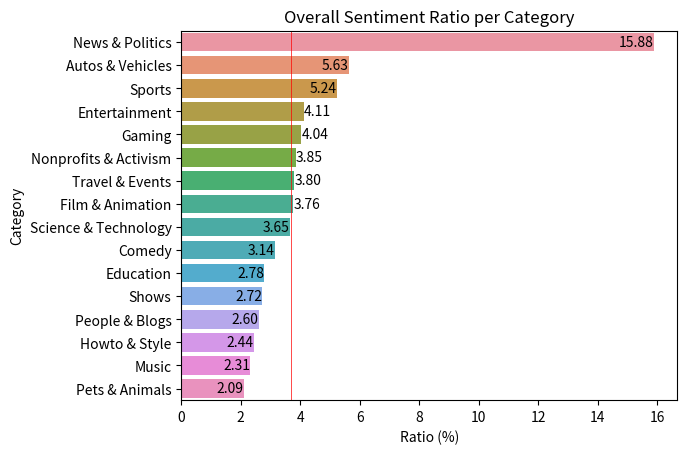

In [39]:
cat_sentiment = data[(data['Ratings Feature']=='Available') & (data['Likes']!=0)][['Category','Video ID','Trending Date','Likes','Dislikes']]
cat_sentiment = cat_sentiment.groupby(['Category','Video ID'],group_keys=True).apply(lambda x: x[['Trending Date','Likes','Dislikes']])
cat_sentiment['Ratio'] = cat_sentiment[['Likes','Dislikes']].apply(lambda x: round((x[1]/x[0])*100,2),axis=1)
cat_sentiment = cat_sentiment.groupby('Category')[['Ratio']].median().reset_index().sort_values('Ratio',ascending=False)

x, y = cat_sentiment['Ratio'], cat_sentiment['Category']
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x:.0f}'))

for i, val in enumerate(cat_sentiment['Ratio']):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center') if i < 3 else\
        plt.annotate(f'{val:,.2f}', xy=(val,i), ha='left', va='center') if i < 8 else\
            plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center')

plt.axvline(sentiment['Ratio'].median(), color='red', linewidth=.5)
plt.xlabel('Ratio (%)')
plt.title('Overall Sentiment Ratio per Category')

Videos with the theme News & Politics have a high level of negative sentiment because this topic is often related to complex and controversial issues in society. This can trigger debate and conflict between groups with different views, and in the end can trigger a negative response from the content published.

Text(0.5, 0, 'Dislikes/Likes')

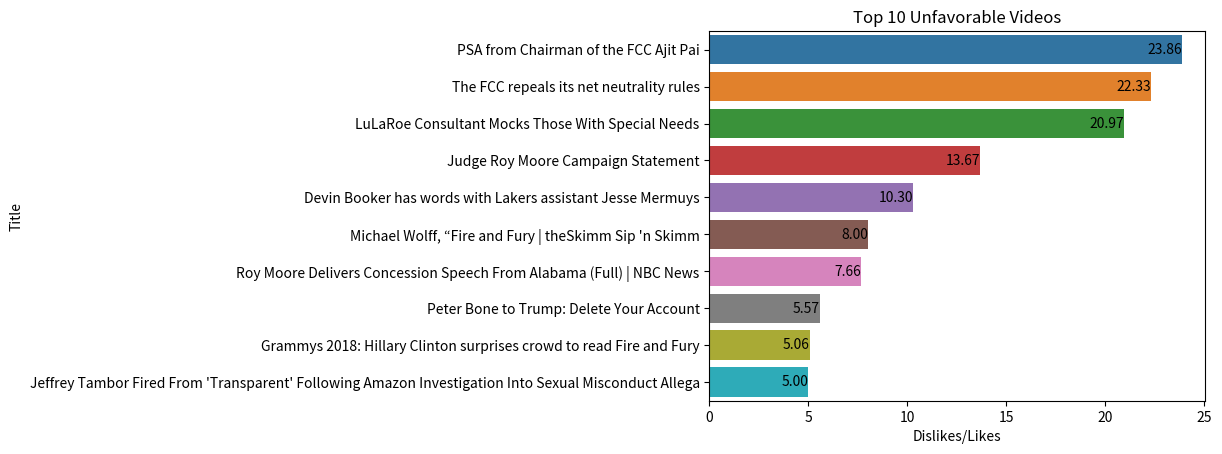

In [40]:
vid_sentiment = sentiment.reset_index().sort_values('Ratio',ascending=False).head(10)

x, y = vid_sentiment['Ratio'], vid_sentiment['Title']
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x/100:.0f}'))

for i, val in enumerate(x):
    plt.annotate(f'{val/100:.2f}', xy=(val,i), ha='right', va='center')

plt.title('Top 10 Unfavorable Videos')
plt.xlabel('Dislikes/Likes')

It can be seen that the 10 videos with the top negative sentiments are occupied by videos with the theme of news from an event that smells of social politics. The value is quite extreme where the number of dislikes responses can be many times the number of likes you get. This is an evaluation material for content creators to avoid things that are sensitive and offensive in the content they produce.

##### **Similarity Degree**

Similarity degree is a measure to measure the extent to which two or more objects have the same context in terms of certain characteristics, features or characteristics. This calculation is obtained from a comparison of the number of common tags of the total tags used by a video. First of all we will analyze and measure the data distribution of common rate for all videos.

Text(0.5, 0, 'Ratio (%)')

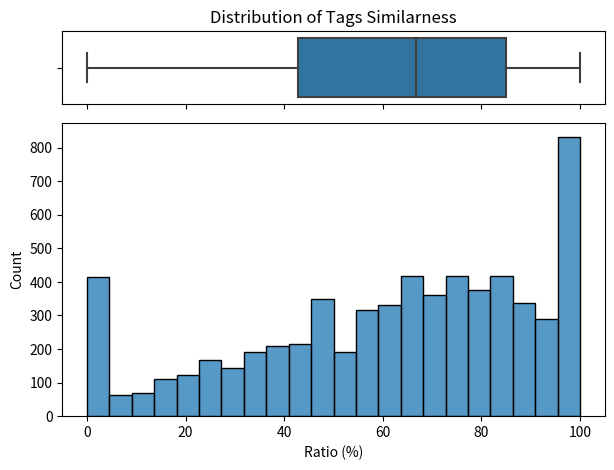

In [41]:
vid_similarity = data[['Title','Common Rate (%)']].copy()
vid_similarity = vid_similarity.groupby('Title').mean().reset_index()

fig, axs = plt.subplots(nrows=2,figsize=(7,5),sharex=True,gridspec_kw={'height_ratios':[1,4],'hspace':.1})
boxplot = sns.boxplot(x=vid_similarity['Common Rate (%)'], ax=axs[0])
boxplot.set_xlabel('')
boxplot.set_title('Distribution of Tags Similarness')
histplot = sns.histplot(x=vid_similarity['Common Rate (%)'], ax=axs[1])
histplot.set_xlabel('Ratio (%)')

It can be seen at a glance that the distribution of the data forms a uniform pattern in which it is almost certain that the data is not normally distributed. It is necessary to carry out statistical tests to meet these assumptions.

In [42]:
stat, pvalue = kstest(
    data['Common Rate (%)'].values.reshape(-1),
    np.random.normal(
        vid_similarity['Common Rate (%)'].mean(),
        vid_similarity['Common Rate (%)'].std(),
        size=len(vid_similarity['Common Rate (%)'].values.reshape(-1))
    )
)

if pvalue > 0.05:
    print('Data is normally distributed. As for that, central tendency will use mean.')
else:
    print('Data is not normally distributed. As for that, central tendency will use median.')

Data is not normally distributed. As for that, central tendency will use median.


The previous assumptions provide evidence that the common rate variation is not normally distributed and this can be used as a reference in calculating the distribution in each video category using the median value.

Text(0.5, 1.0, 'Overall Similarity per Category')

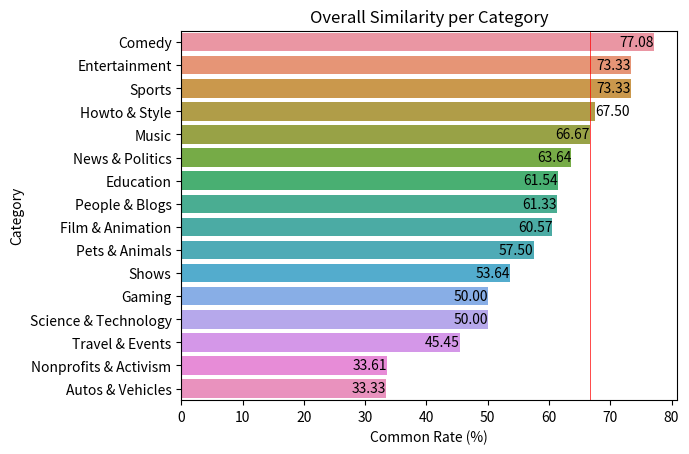

In [43]:
cat_similarity = data[['Category','Title','Common Rate (%)']].copy()
cat_similarity = cat_similarity.groupby(['Category','Title'],group_keys=True).apply(lambda x: x[['Common Rate (%)']])
cat_similarity = cat_similarity.groupby(['Category','Title']).mean().groupby('Category').median().reset_index()
cat_similarity = cat_similarity.sort_values('Common Rate (%)',ascending=False)

x, y = cat_similarity['Common Rate (%)'], cat_similarity['Category']
sns.barplot(x=x,y=y).xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,y: f'{x:.0f}'))

for i, val in enumerate(cat_similarity['Common Rate (%)']):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center') if i < 3 else\
        plt.annotate(f'{val:,.2f}', xy=(val,i), ha='left', va='center') if i < 4 else\
            plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center')

plt.axvline(vid_similarity['Common Rate (%)'].median(), color='red', linewidth=.5)
plt.title('Overall Similarity per Category')

Some video categories with a fairly dominant number of views and engagement depend on the embedded hashtags. For example, the Comedy category broadly uses hashtags such as parody, stand-up, funny, comedy, laugh, and others with the aim of providing context for the videos uploaded making it easier for users with similar preferences to find these videos on the trending list or the search feature on **YouTube**. Therefore, using the right hashtags is quite crucial in getting the optimal number of views and engagement.

Text(0.5, 1.0, 'Similarity of Top 10 Viewed Videos')

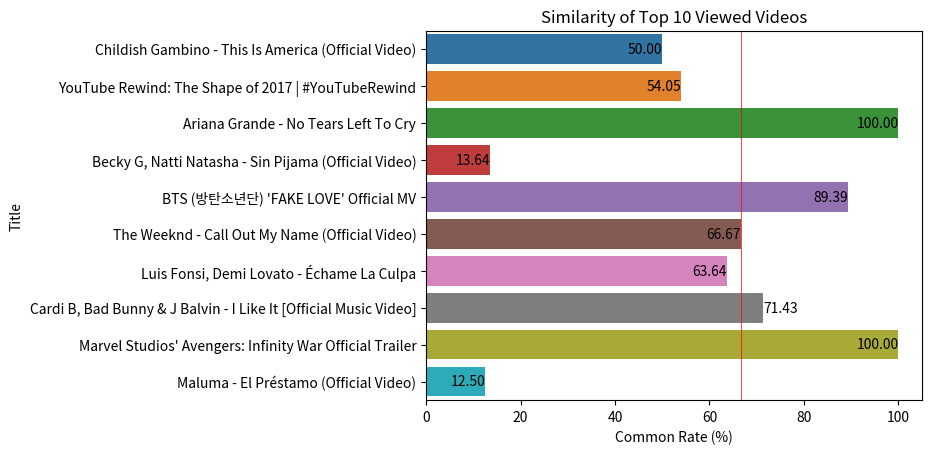

In [44]:
position = {title: i for i, title in enumerate(vid_topview['Title'].values)}
data['Position'] = data['Title'].map(position)
topview_similarity = data.loc[data['Title'].isin(vid_topview['Title'].values)][['Title','Common Rate (%)','Position']]
topview_similarity = topview_similarity.groupby('Title').mean().sort_values('Position').reset_index()

x, y = topview_similarity['Common Rate (%)'], topview_similarity['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center') if i < 7 else\
        plt.annotate(f'{val:,.2f}', xy=(val,i), ha='left', va='center') if i < 8 else\
            plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center')

plt.axvline(vid_similarity['Common Rate (%)'].median(), color='red', linewidth=.5)
plt.title('Similarity of Top 10 Viewed Videos')

In some videos with the most dominant number of views, most of them embed hashtags in their videos which are generally used in other videos as well. Even though the results are not significant enough, the use of hashtags remains a factor that content creators can consider as a boost to the number of views and engagement in addition to other factors, such as categories, content quality, and the number of user segments with preferences according to that context.

Text(0.5, 1.0, 'Similarity of Top 10 Engaging Videos')

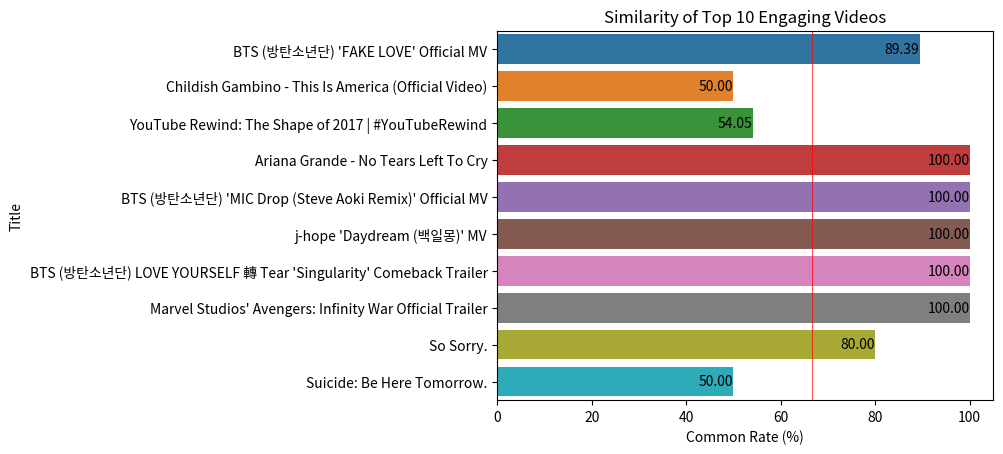

In [45]:
position = {title: i for i, title in enumerate(vid_topgage['Title'].values)}
data['Position'] = data['Title'].map(position)
topgage_similarity = data.loc[data['Title'].isin(vid_topgage['Title'].values)][['Title','Common Rate (%)','Position']]
topgage_similarity = topgage_similarity.groupby('Title').mean().sort_values('Position').reset_index()

x, y = topgage_similarity['Common Rate (%)'], topgage_similarity['Title']
sns.barplot(x=x,y=y)

for i, val in enumerate(x):
    plt.annotate(f'{val:,.2f}', xy=(val,i), ha='right', va='center')

plt.axvline(vid_similarity['Common Rate (%)'].median(), color='red', linewidth=.5)
plt.title('Similarity of Top 10 Engaging Videos')

Some videos with a fairly dominant number of engagement are felt to have a significant correlation with common tags considering that the more and more familiar contexts used the easier the video is to find so as to attract users' interest in enjoying the content and providing a response in the form of likes and comments.

In [46]:
similarity = data[['Similarity']].copy()

pie = px.pie(
    pd.DataFrame(similarity['Similarity'].value_counts()).reset_index(), 
    values=pd.DataFrame(similarity['Similarity'].value_counts()).reset_index()['count'],
    names=pd.DataFrame(similarity['Similarity'].value_counts()).reset_index()['Similarity']
)

pie.update_layout(title='Video Similarity Proportion',width=500,height=450)
pie.show()

Most of the trending videos have a fairly high degree of similarity to other videos in terms of the context or hashtags used. Although not a major factor, at least using the right hashtags can help increase the number of views and engagement of a video and is a requirement for the **YouTube** algorithm in determining the priority of videos that will appear on the trending list.

### **Recommendations**

It is necessary to evaluate all insights that have been generated in the Explanatory Data Analysis section, which are as follows:
1. Information about the target audience can provide insight into who is the target audience based on preferences and search history. Preferences can be seen from the audience's track record of responding in the form of likes and comments on videos. This can be used as a determining factor by the **YouTube** algorithm regarding which videos with similar categories to recommend so that cost effectiveness can be minimized starting from the time side and the capacity of the trending list that can be loaded at a certain time. On the other hand, the campaign or advertising algorithm functionality of a brand can be maximized to suit the video context and behavioural instinct of each user with the aim of minimizing the level of disruption which is quite significant to the possibility of ignorance occurrence.

1. Video performance can be measured from engagement rate which is growing all the time. A video that does not meet the trending criteria or reaches a saturation point can be removed from the trending page in order to maximize the accessibility of users who are limited by time and the many choices of trending videos that must be enjoyed. Priority recommendations on channels with fairly good performance can be used as a reference by **YouTube** algorithm in determining what content can be loaded on a trending page at a time. This is based on the amount of engagement that can be achieved from loyal users so they can decide whether a video that is trending can attract the interest of new potential viewers or not.
1. Validation Approval System which can screen new uploaded content to determine the suitability of the attributes used. For example, videos in certain categories must have qualified requirements to be included in that category. If not, it will potentially create a discrepancy between the video and the audience who enjoys it. This can lead to a fairly low engagement rate and have implications for wasted user time without any positive benefits being received in return.
1. Assist content creators with certain features such as guidelines, statistical analysis, video quality improvement and attribute recommendations on hashtags when in the process of compiling new content so that it can be received positively by service users.
1. Providing facilities that can enhance the relationship between content creators and viewers, such as, but not limited to live streaming services, premiere access, discussion forums, and interactive features in the comment section. The goal is to create sustainability viewers who will potentially continue to provide support to content creators to continue to produce quality new content and provide positive benefits to platform users.
1. Better user experience so as to maximize the main factors that can increase engagement rate, such as easy user accessibility, video performance analysis, monetization, as well as technical and community support.